In [ ]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/Python/ORG01-01082021-31072022.csv') #reading the csv file

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.duplicated().sum()

1

In [ ]:
df2 = df.copy()

In [ ]:
unique_cols= ['BookingStatus','IsLeadAttendee','EventType','Season' ]

In [ ]:
import datetime as dt
# df2.set_index('StartDate',inplace=True)

In [ ]:
# df3 = df2.copy().reset_index()
df2['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df['StatusCreatedDate'])

In [ ]:
df2['days_to_event'] = df2['time_to_event']/ np.timedelta64(1, 'D')

In [ ]:
df2.drop(df2[df2['days_to_event'] < 0].index, inplace = True)

In [ ]:
df2 = df2.sort_values(by='StatusCreatedDate') 

In [ ]:
df2.set_index('StatusCreatedDate',inplace=True)

In [ ]:
df2['StartDate'] = pd.to_datetime(df2.index, dayfirst=True)

In [ ]:
df2['StatusCreatedDate'] = pd.to_datetime(df2.index, dayfirst=True)

In [ ]:
_condition_winter = (df2.StartDate.dt.month>=1)&(df2.StartDate.dt.month<=3)
_condtion_spring = (df2.StartDate.dt.month>=4)&(df2.StartDate.dt.month<=6)
_condition_summer = (df2.StartDate.dt.month>=7)&(df2.StartDate.dt.month<=9)
_condition_autumn = (df2.StartDate.dt.month>=10)&(df2.StartDate.dt.month<=12)
  # return data

df2['Season'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

In [ ]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
for i in unique_cols:
  df2[i] = encode.fit_transform(df2[i])
# df.head()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61436 entries, 01/01/2022 02:28 to 31/12/2021 23:07
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          61436 non-null  object         
 1   StartDate          61436 non-null  datetime64[ns] 
 2   EventType          61436 non-null  int64          
 3   BookingReference   61436 non-null  object         
 4   AttendeeReference  61436 non-null  object         
 5   GroupSize          61436 non-null  int64          
 6   IsLeadAttendee     61436 non-null  int64          
 7   AttendeeGrossCost  61436 non-null  float64        
 8   EventId            61436 non-null  int64          
 9   BookingStatus      61436 non-null  int64          
 10  AttendeeType       61436 non-null  object         
 11  TicketType         61436 non-null  object         
 12  ClientId           61436 non-null  int64          
 13  time_to_event      61436 

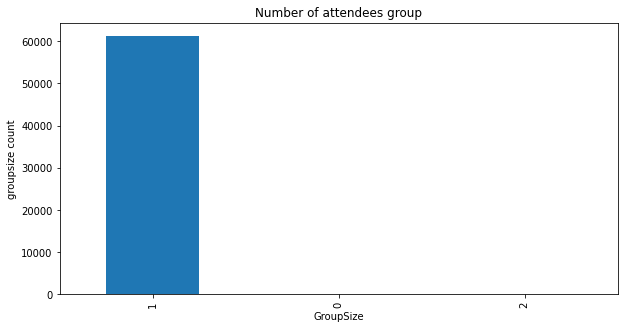

In [ ]:
df2.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

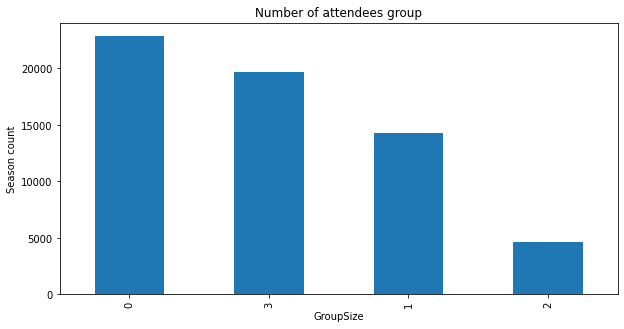

In [ ]:
df2.Season.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('Season count')
plt.xlabel('GroupSize');

In [ ]:
# sns.countplot(x='EventName', data=df);
# plt.xticks(rotation=90);

In [ ]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['GroupSize'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [ ]:
# # Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['cum_booking'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [ ]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df2['GroupSize'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [ ]:
df2.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event,StatusCreatedDate,Season
StatusCreatedDate,,,,,,,,,,,,,,,,,
01/01/2022 02:28,Gaelic Vegetarian and Veganism & Colonial Resi...,2022-01-01 02:28:00,8,B1042459,A1111227,1,1,0.0,25425,0,Attendee,Standard,219,274 days 15:02:00,274.626389,2022-01-01 02:28:00,3
01/01/2022 04:25,Lightning talks: new food researchers,2022-01-01 04:25:00,8,B1042460,A1111228,1,1,0.0,25422,0,Attendee,Standard,219,151 days 09:35:00,151.399306,2022-01-01 04:25:00,3
01/01/2022 08:49,Lightning talks: new food researchers,2022-01-01 08:49:00,8,B1042461,A1111229,1,1,0.0,25422,0,Attendee,Standard,219,151 days 05:11:00,151.215972,2022-01-01 08:49:00,3
01/01/2022 09:27,Gaelic Vegetarian and Veganism & Colonial Resi...,2022-01-01 09:27:00,8,B1042462,A1111230,1,1,0.0,25425,0,Attendee,Standard,219,274 days 08:03:00,274.335417,2022-01-01 09:27:00,3
01/01/2022 13:23,Study at the Warburg: Open Day. Spring 2022,2022-01-01 13:23:00,5,B1042464,A1111232,1,1,0.0,25302,0,CIV Taught Programmes,CIV Taught Programmes,219,60 days 00:22:00,60.015278,2022-01-01 13:23:00,3


<AxesSubplot:xlabel='StatusCreatedDate'>

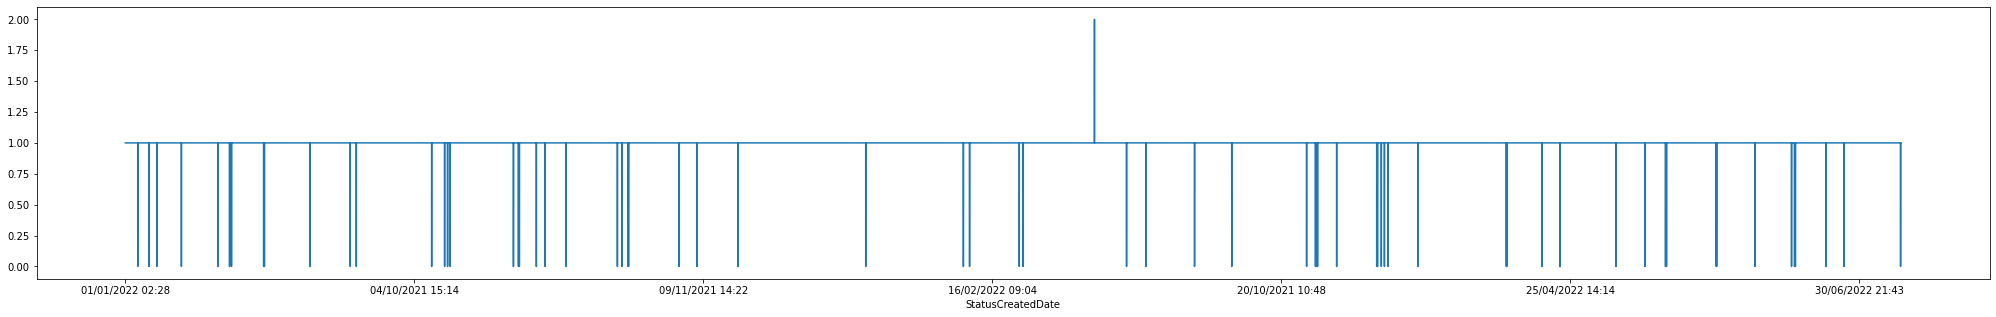

In [ ]:
plt.figure(figsize=(35,5))
df2['GroupSize'].plot()

In [ ]:
df2['cum_booking'] = df2['GroupSize'].cumsum(axis=0)

<AxesSubplot:xlabel='StatusCreatedDate'>

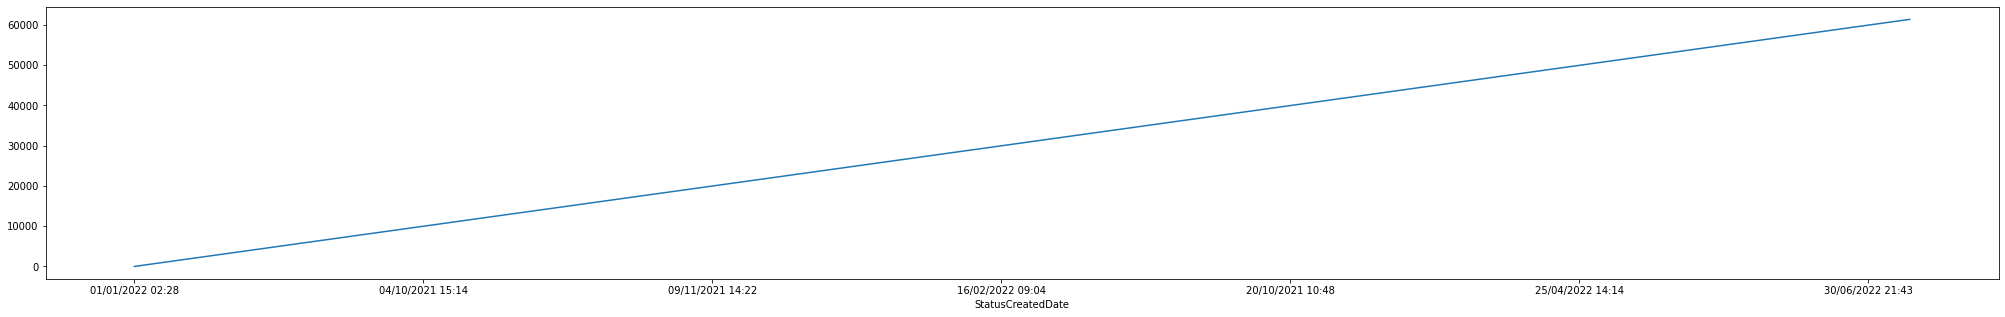

In [ ]:
plt.figure(figsize=(35,5))
df2['cum_booking'].plot()

In [ ]:
dfs = df2.copy()

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs['GroupSize'], test_size=.3, shuffle=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:                43005
Model:                 ARIMA(2, 0, 1)   Log Likelihood               85659.726
Date:                Mon, 06 Mar 2023   AIC                        -171309.452
Time:                        12:21:22   BIC                        -171266.106
Sample:                             0   HQIC                       -171295.778
                              - 43005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9990      0.000   2165.157      0.000       0.998       1.000
ar.L1          0.0209      0.371      0.056      0.955      -0.706       0.747
ar.L2         -0.0023      0.029     -0.080      0.9

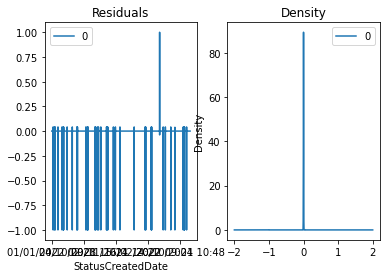

In [ ]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(2,0,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [ ]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)
# pred.index=dfs.index[start:end+1]



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


43005    0.999038
43006    0.998998
43007    0.998999
43008    0.998999
43009    0.998999
           ...   
61431    0.998999
61432    0.998999
61433    0.998999
61434    0.998999
61435    0.998999
Name: predicted_mean, Length: 18431, dtype: float64
StatusCreatedDate
01/01/2022 02:28    1
01/01/2022 04:25    1
01/01/2022 08:49    1
01/01/2022 09:27    1
01/01/2022 13:23    1
                   ..
22/01/2022 16:53    1
22/01/2022 17:02    1
22/01/2022 17:19    1
22/01/2022 17:19    1
22/01/2022 17:49    1
Name: GroupSize, Length: 43005, dtype: int64


In [ ]:
print(pred)

43005    0.999038
43006    0.998998
43007    0.998999
43008    0.998999
43009    0.998999
           ...   
61431    0.998999
61432    0.998999
61433    0.998999
61434    0.998999
61435    0.998999
Name: predicted_mean, Length: 18431, dtype: float64


In [ ]:
pred.index=dfs.index[start:end+1]

<AxesSubplot:xlabel='StatusCreatedDate'>

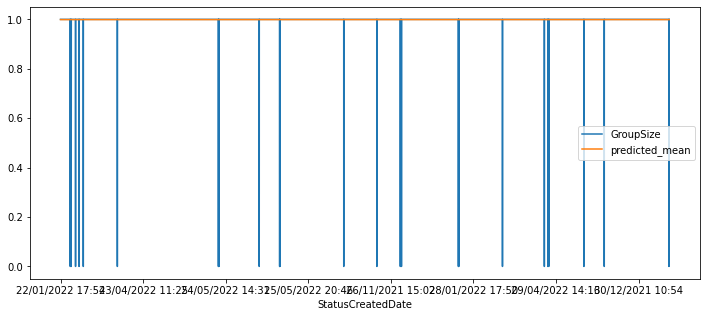

In [ ]:
test.plot(legend=True, figsize=(12,5))
pred.plot(legend=True, figsize=(12,5))



In [ ]:
# pd.concat([dfs['GroupSize'],pred], axis=1).plot()
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  0.0024626708807531945


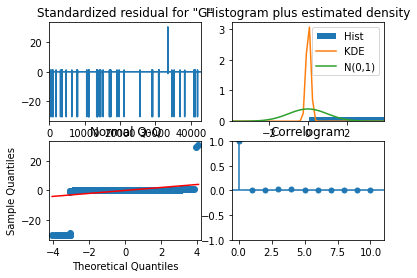

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()
# model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
dfPred = df2.set_index('StatusCreatedDate')
dfPred = dfPred.resample('w').sum()
dfPred
# df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], dayfirst=True)

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId,days_to_event,Season,cum_booking
StatusCreatedDate,,,,,,,,,,
2021-03-07,8,1,1,0.0,24077,0,219,161.939583,3,11110
2021-03-14,14,2,2,0.0,48148,0,438,88.843056,6,38018
2021-03-21,14,2,2,0.0,48148,0,438,429.786111,6,60359
2021-03-28,0,0,0,0.0,0,0,0,0.000000,0,0
2021-04-04,0,0,0,0.0,0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-06-19,5502,945,947,1130.0,24762078,2,207393,7989.601389,947,27972196
2022-06-26,5107,838,839,2565.0,21954042,1,183741,5038.075000,839,37686011
2022-07-03,4145,686,686,1320.0,17980886,0,150234,30980.154167,903,27416413


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61436 entries, 01/01/2022 02:28 to 31/12/2021 23:07
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          61436 non-null  object         
 1   StartDate          61436 non-null  datetime64[ns] 
 2   EventType          61436 non-null  int64          
 3   BookingReference   61436 non-null  object         
 4   AttendeeReference  61436 non-null  object         
 5   GroupSize          61436 non-null  int64          
 6   IsLeadAttendee     61436 non-null  int64          
 7   AttendeeGrossCost  61436 non-null  float64        
 8   EventId            61436 non-null  int64          
 9   BookingStatus      61436 non-null  int64          
 10  AttendeeType       61436 non-null  object         
 11  TicketType         61436 non-null  object         
 12  ClientId           61436 non-null  int64          
 13  time_to_event      61436 

In [ ]:
dfs.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event,StatusCreatedDate,Season,cum_booking
StatusCreatedDate,,,,,,,,,,,,,,,,,,
01/01/2022 02:28,Gaelic Vegetarian and Veganism & Colonial Resi...,2022-01-01 02:28:00,8,B1042459,A1111227,1,1,0.0,25425,0,Attendee,Standard,219,274 days 15:02:00,274.626389,2022-01-01 02:28:00,3,1
01/01/2022 04:25,Lightning talks: new food researchers,2022-01-01 04:25:00,8,B1042460,A1111228,1,1,0.0,25422,0,Attendee,Standard,219,151 days 09:35:00,151.399306,2022-01-01 04:25:00,3,2
01/01/2022 08:49,Lightning talks: new food researchers,2022-01-01 08:49:00,8,B1042461,A1111229,1,1,0.0,25422,0,Attendee,Standard,219,151 days 05:11:00,151.215972,2022-01-01 08:49:00,3,3
01/01/2022 09:27,Gaelic Vegetarian and Veganism & Colonial Resi...,2022-01-01 09:27:00,8,B1042462,A1111230,1,1,0.0,25425,0,Attendee,Standard,219,274 days 08:03:00,274.335417,2022-01-01 09:27:00,3,4
01/01/2022 13:23,Study at the Warburg: Open Day. Spring 2022,2022-01-01 13:23:00,5,B1042464,A1111232,1,1,0.0,25302,0,CIV Taught Programmes,CIV Taught Programmes,219,60 days 00:22:00,60.015278,2022-01-01 13:23:00,3,5


## checking for stationarity


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# ADF Test on each column
for name, column in dfPred.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EventType" 
    -----------------------------------------------
ADF Statistic: -1.982027
p-value: 0.294509
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Non-stationary


    Augmented Dickey-Fuller Test on "GroupSize" 
    -----------------------------------------------
ADF Statistic: -3.417902
p-value: 0.010364
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Stationary


    Augmented Dickey-Fuller Test on "IsLeadAttendee" 
    -----------------------------------------------
ADF Statistic: -3.415568
p-value: 0.010439
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Stationary


    Augmented Dickey-Fuller Test on "AttendeeGrossCost" 
    -----------------------------------------------
ADF Statistic: -1.444167
p-value: 0.560928
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Non-stationary


    Augmented Dickey-Fuller Test on "EventId" 
    -----------------------------------------------
ADF Statistic: -3.417253
p-value: 0.

# weekly arima

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfPred['GroupSize'], test_size=.3, shuffle=False)

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfPred['GroupSize'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1134.899, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1138.329, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1136.921, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1135.614, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1136.329, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1134.149, Time=1.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1134.991, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1132.151, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1134.149, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1138.649, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1130.384, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1133.616, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1134.921, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1132.384, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -562.192
Date:                Mon, 06 Mar 2023   AIC                           1130.384
Time:                        12:21:36   BIC                           1137.172
Sample:                    03-07-2021   HQIC                          1133.083
                         - 07-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5299      0.151      3.503      0.000       0.233       0.826
ma.L1         -0.8654      0.104     -8.318      0.000      -1.069      -0.661
sigma2      4.393e+05   4.23e+04     10.382      0.000    3.56e+05    5.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               144.13
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             852.22   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -391.233
Date:                Mon, 06 Mar 2023   AIC                            788.466
Time:                        12:21:36   BIC                            794.142
Sample:                    03-07-2021   HQIC                           790.619
                         - 02-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7191      0.364     -1.974      0.048      -1.433      -0.005
ma.L1          0.5532      0.378      1.462      0.144      -0.188       1.295
sigma2      5.038e+05   5.41e+04      9.307      0.0

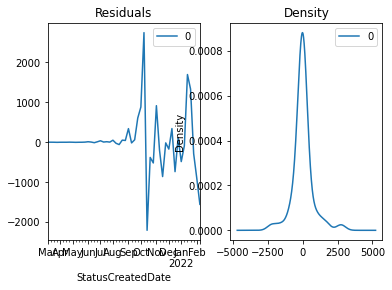

In [ ]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(1,1,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [ ]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)

2022-02-20    767.332861
2022-02-27    621.120596
2022-03-06    726.258676
2022-03-13    650.656155
2022-03-20    705.020294
2022-03-27    665.928216
2022-04-03    694.038484
2022-04-10    673.824998
2022-04-17    688.360079
2022-04-24    677.908217
2022-05-01    685.423925
2022-05-08    680.019541
2022-05-15    683.905717
2022-05-22    681.111252
2022-05-29    683.120691
2022-06-05    681.675747
2022-06-12    682.714775
2022-06-19    681.967632
2022-06-26    682.504887
2022-07-03    682.118559
2022-07-10    682.396359
2022-07-17    682.196599
Freq: W-SUN, Name: predicted_mean, dtype: float64
StatusCreatedDate
2021-03-07       1
2021-03-14       2
2021-03-21       2
2021-03-28       0
2021-04-04       0
2021-04-11       0
2021-04-18       0
2021-04-25       2
2021-05-02       2
2021-05-09       0
2021-05-16       0
2021-05-23       0
2021-05-30       3
2021-06-06      15
2021-06-13      18
2021-06-20       7
2021-06-27      20
2021-07-04      54
2021-07-11      55
2021-07-18      70
20

In [ ]:
pred.index=dfPred.index[start:end+1]

In [ ]:
print(pred)


StatusCreatedDate
2022-02-20    767.332861
2022-02-27    621.120596
2022-03-06    726.258676
2022-03-13    650.656155
2022-03-20    705.020294
2022-03-27    665.928216
2022-04-03    694.038484
2022-04-10    673.824998
2022-04-17    688.360079
2022-04-24    677.908217
2022-05-01    685.423925
2022-05-08    680.019541
2022-05-15    683.905717
2022-05-22    681.111252
2022-05-29    683.120691
2022-06-05    681.675747
2022-06-12    682.714775
2022-06-19    681.967632
2022-06-26    682.504887
2022-07-03    682.118559
2022-07-10    682.396359
2022-07-17    682.196599
Freq: W-SUN, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='StatusCreatedDate'>

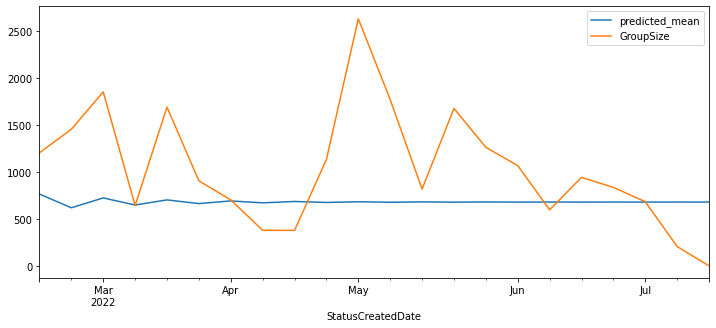

In [ ]:
pred.plot(legend=True, figsize=(12,5))

test.plot(legend=True, figsize=(12,5))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  522.7588031724063


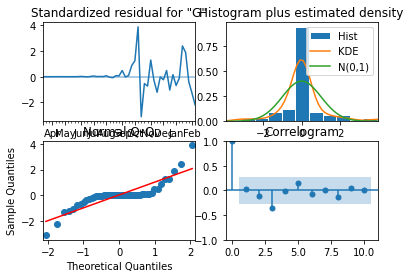

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()
# model_fit.plot_predict(dynamic=False)
plt.show()

# prediction using XGboost

In [ ]:
def create_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['hour'] = dfs.index.hour
    dfs['dayofweek'] = dfs.index.dayofweek
    dfs['quarter'] = dfs.index.quarter
    dfs['month'] = dfs.index.month
    dfs['year'] = dfs.index.year
    dfs['dayofyear'] = dfs.index.dayofyear
    dfs['dayofmonth'] = dfs.index.day
    dfs['weekofyear'] = dfs.index.isocalendar().week
    return dfs

dfs = create_features(dfPred)

In [ ]:
dfs.head()

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId,days_to_event,Season,cum_booking,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
StatusCreatedDate,,,,,,,,,,,,,,,,,,
2021-03-07,8,1,1,0.0,24077,0,219,161.939583,3,11110,0,6,1,3,2021,66,7,9
2021-03-14,14,2,2,0.0,48148,0,438,88.843056,6,38018,0,6,1,3,2021,73,14,10
2021-03-21,14,2,2,0.0,48148,0,438,429.786111,6,60359,0,6,1,3,2021,80,21,11
2021-03-28,0,0,0,0.0,0,0,0,0.000000,0,0,0,6,1,3,2021,87,28,12
2021-04-04,0,0,0,0.0,0,0,0,0.000000,0,0,0,6,2,4,2021,94,4,13


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2021-03-07 to 2022-07-17
Freq: W-SUN
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventType          72 non-null     int64  
 1   GroupSize          72 non-null     int64  
 2   IsLeadAttendee     72 non-null     int64  
 3   AttendeeGrossCost  72 non-null     float64
 4   EventId            72 non-null     int64  
 5   BookingStatus      72 non-null     int64  
 6   ClientId           72 non-null     int64  
 7   days_to_event      72 non-null     float64
 8   Season             72 non-null     int64  
 9   cum_booking        72 non-null     int64  
 10  hour               72 non-null     int64  
 11  dayofweek          72 non-null     int64  
 12  quarter            72 non-null     int64  
 13  month              72 non-null     int64  
 14  year               72 non-null     int64  
 15  dayofyear          72 non-null     int64  
 

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs, test_size=.3, shuffle=False)

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['EventType','Season','days_to_event','BookingStatus','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'GroupSize'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[12:35:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1280.51430	validation_1-rmse:1194.27737
[100]	validation_0-rmse:587.70309	validation_1-rmse:490.82873
[200]	validation_0-rmse:300.65620	validation_1-rmse:243.74497
[300]	validation_0-rmse:167.98442	validation_1-rmse:153.23328
[400]	validation_0-rmse:99.33227	validation_1-rmse:127.32249
[500]	validation_0-rmse:60.70116	validation_1-rmse:117.78708
[600]	validation_0-rmse:37.86866	validation_1-rmse:116.49158
[700]	validation_0-rmse:24.15314	validation_1-rmse:115.55071
[800]	validation_0-rmse:15.86429	validation_1-rmse:113.07165
[900]	validation_0-rmse:11.02208	validation_1-rmse:111.71579
[999]	validation_0-rmse:8.09928	validation_1-rmse:110.69435


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

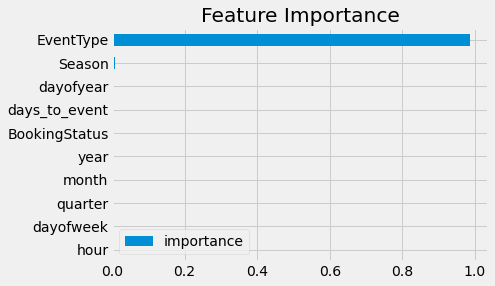

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_, index= reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

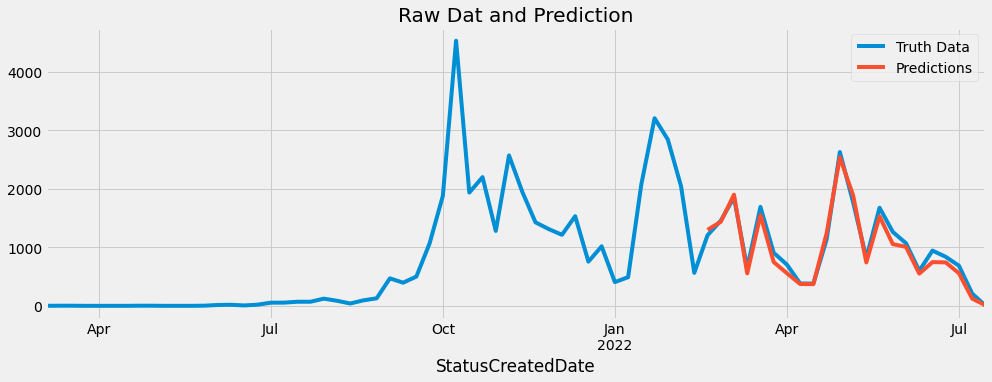

In [ ]:
test['prediction'] = reg.predict(X_test)
dfs = dfs.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfs[['GroupSize']].plot(figsize=(15, 5))
test['prediction'].plot(legend=True)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['GroupSize'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 110.69


<AxesSubplot:xlabel='StatusCreatedDate'>

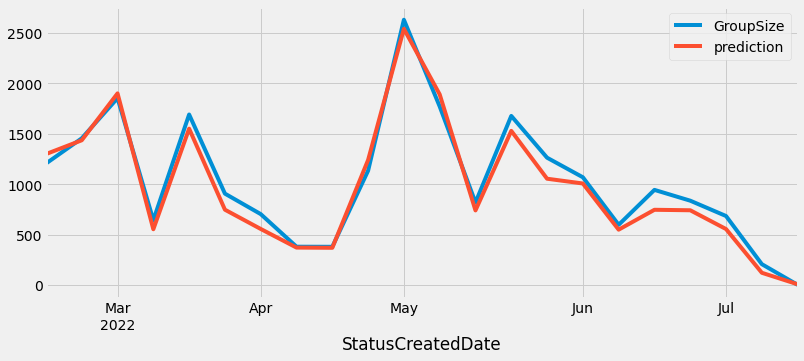

In [ ]:
test['GroupSize'].plot(legend=True, figsize=(12,5))
test['prediction'].plot(legend=True, figsize=(12,5))
# style='.'
# test['GroupSize'].plot(legend=True, figsize=(12,5))

In [ ]:
# plt.figure(figsize=(20,10))
# sns.heatmap(dfs.corr(), annot = True)

In [ ]:
test['cum_prediction'] = test['prediction'].cumsum(axis=0)

In [ ]:
test

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId,days_to_event,Season,cum_booking,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction,cum_prediction
StatusCreatedDate,,,,,,,,,,,,,,,,,,,,
2022-02-20,8838,1206,1206,5625.0,30794637,0,264114,35132.865972,3618,37646234,0,6,1,2,2022,51,20,7,1299.830688,1299.830688
2022-02-27,10477,1456,1460,7735.0,37389105,4,319740,54638.872917,4380,66942981,0,6,1,2,2022,58,27,8,1436.685425,2736.516113
2022-03-06,13130,1854,1859,5165.0,47629856,5,407121,187388.145139,5577,24044859,0,6,1,3,2022,65,6,9,1901.248901,4637.765137
2022-03-13,4709,645,645,5635.0,16524083,0,141255,22172.561806,1935,12292554,0,6,1,3,2022,72,13,10,554.940369,5192.705566
2022-03-20,10931,1692,1692,7490.0,43386110,0,370548,41766.588194,5076,52567703,0,6,1,3,2022,79,20,11,1551.734863,6744.440430
2022-03-27,5288,908,916,6289.0,23592855,8,200604,45523.724306,2748,42011684,0,6,1,3,2022,86,27,12,748.771057,7493.211426
2022-04-03,4279,705,708,11816.0,18242388,3,155052,47665.093750,1800,32105778,0,6,2,4,2022,93,3,13,557.747375,8050.958984
2022-04-10,2216,382,385,4885.0,9965654,3,84315,30632.979167,385,4613978,0,6,2,4,2022,100,10,14,373.279724,8424.238281
2022-04-17,2552,381,381,2650.0,9888034,0,83439,16987.240278,381,9752471,0,6,2,4,2022,107,17,15,371.089630,8795.328125


<AxesSubplot:xlabel='StatusCreatedDate'>

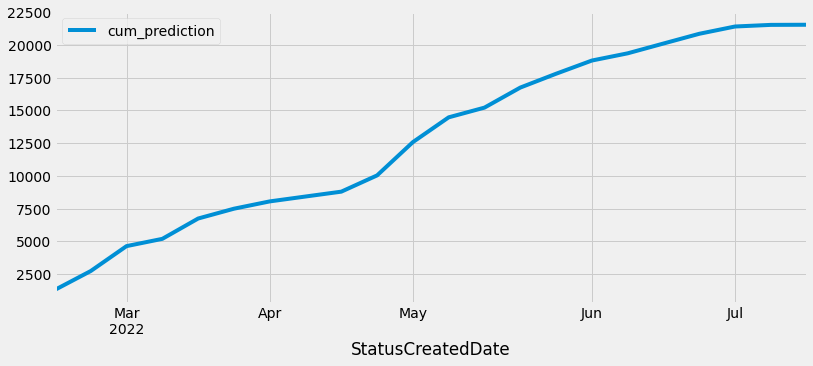

In [ ]:
test['cum_prediction'].plot(legend=True, figsize=(12,5))


<AxesSubplot:xlabel='StatusCreatedDate'>

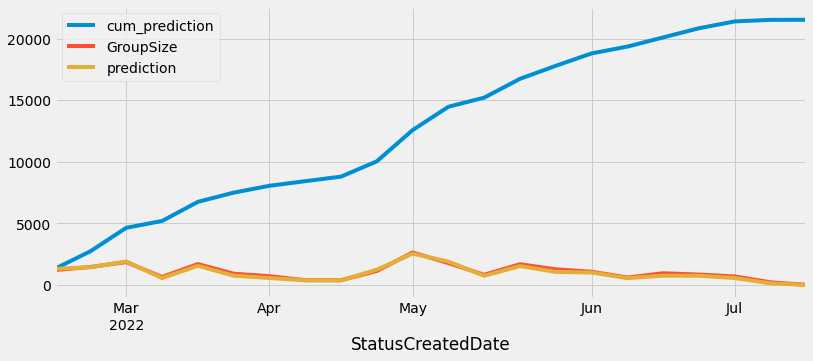

In [ ]:
test['cum_prediction'].plot(legend=True, figsize=(12,5))
test['GroupSize'].plot(legend=True, figsize=(12,5))
test['prediction'].plot(legend=True, figsize=(12,5))

In [ ]:
test['days_to_event'].nunique()

22

In [ ]:
17500/22

795.4545454545455

In [ ]:
df2.head(1)

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event,StatusCreatedDate,Season,cum_booking
StatusCreatedDate,,,,,,,,,,,,,,,,,,
01/01/2022 02:28,Gaelic Vegetarian and Veganism & Colonial Resi...,2022-01-01 02:28:00,8,B1042459,A1111227,1,1,0.0,25425,0,Attendee,Standard,219,274 days 15:02:00,274.626389,2022-01-01 02:28:00,3,1
